# Multi-Class Classification

In the previous lectures we learned about how to use logistic regression to perform a binary classification. In many real life situations, we actually need to classify data into multiple classes.

For this series of lectures, we'll go through the following steps:

<br>
1.) Introduction to the Iris Data Set
<br>
2.) Introduction to Multi-Class Classification (Logistic Regression)
<br>
3.) Data Formatting
<br>
4.) Data Visualization Analysis
<br>
5.) Multi-Class Classification with Sci Kit Learn
<br>
6.) Explanation of K Nearest Neighbors
<br>
7.) K Nearest Neighbors with Sci Kit Learn
<br>
8.) Conclusion
<br>

Let's get started!

## Step 1: Introduction to the Iris Data Set

For this series of lectures, we will be using the famous Iris <a href="https://en.wikipedia.org/wiki/Iris_flower_data_set" target="_blank">flower data set</a>.

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by Sir Ronald Fisher in the 1936 as an example of discriminant analysis.

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor), so 150 total samples. Four features were measured from each sample: the length and the width of the sepals and petals, in centimetres.

Here's a picture of the three different Iris types:

In [1]:
# Data Imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Plot Imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [2]:
from sklearn import linear_model
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [5]:
X = iris.data

Y = iris.target

In [7]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [8]:
iris_data = DataFrame(X,columns=['Sepal Length','Sepal Width','Petal Length','Petal Width'])

In [9]:
iris_target = DataFrame(Y,columns=['Species'])

In [10]:
iris_target.tail()

,Species
145,2
146,2
147,2
148,2
149,2


In [11]:
def flower(num):
    if num == 0:
        return 'Setosa'
    elif num == 1:
        return 'Versicolour'
    else:
        return 'Virginica'

In [12]:
iris_target['Species'] = iris_target['Species'].apply(flower)

In [13]:
iris_target.head()

,Species
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa


In [14]:
iris_target.tail()

,Species
145,Virginica
146,Virginica
147,Virginica
148,Virginica
149,Virginica


In [15]:
iris = pd.concat([iris_data,iris_target],axis=1)

In [16]:
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


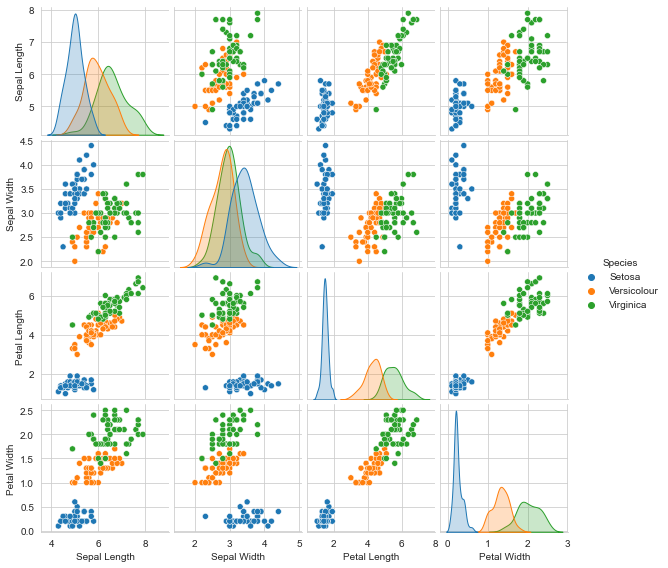

In [18]:
sns.pairplot(iris,hue='Species',height=2)

C:\Users\mrloc\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\mrloc\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


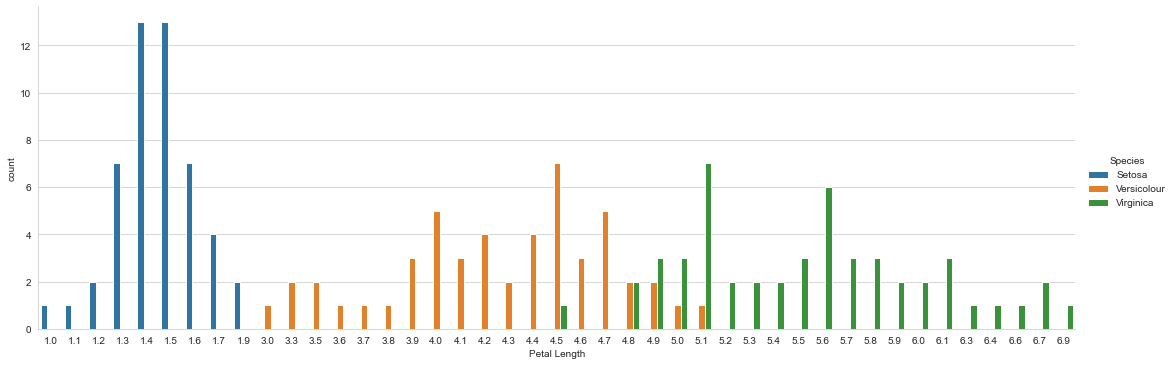

In [20]:
sns.factorplot('Petal Length',data=iris,hue='Species',kind='count',aspect=3)